# Graph My Task Statistics

We'll use the matplotlib [Stacked Area Plot](https://www.python-graph-gallery.com/stacked-area-plot/) to visualize the accumulation of incoming vs. completed tasks over time.

In [13]:
%matplotlib widget

import math
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import mplcursors

from main import AmazingCloudAntClient

client = AmazingCloudAntClient()

# Get tasks since...
since = dt.datetime(2021, 1, 1).timestamp() * 1000
chart_data = client.get_task_stats_for_chart(since=since)

date_fmt = DateFormatter("%Y-%m-%d")

Avg New Tasks per Day: 5.834080717488789
Avg Completed Tasks per Day: 5.838565022421525
Avg Backlog Increase: -0.004484304932735426


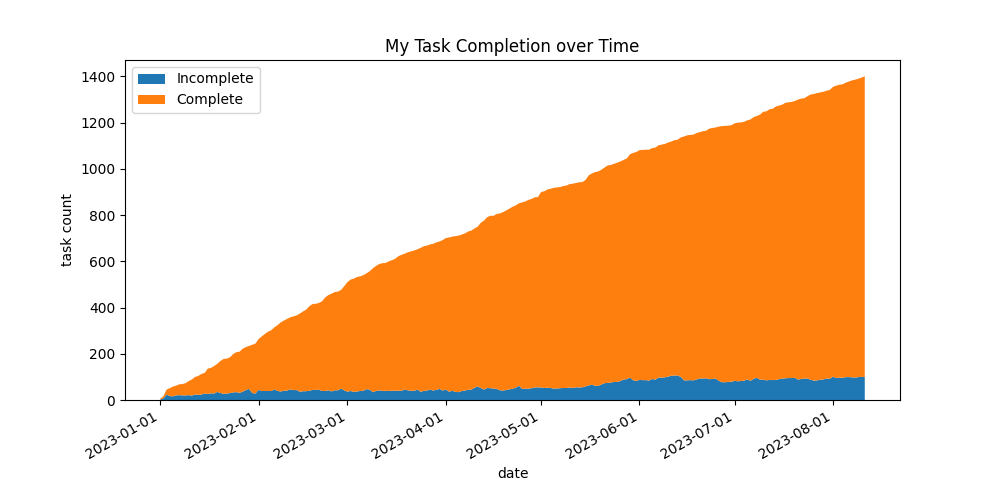

/Users/william/workspace/personal/amazing-marvin/venv/lib/python3.9/site-packages/mplcursors/_pick_info.py:162: UserWarning: Pick support for PolyCollection is missing.
  warnings.warn(f"Pick support for {type(artist).__name__} is missing.")


In [14]:
%matplotlib widget
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set up figure
ax.stackplot(
    chart_data["dates"],
    chart_data["incomplete"],
    chart_data["complete"],
    labels=['Incomplete','Complete'],
)
plt.legend(loc='upper left')
plt.title("My Task Completion over Time")
plt.xlabel('date')
plt.ylabel('task count')

# Format Dates
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(date_fmt)

mplcursors.cursor(hover=True)

# Quick Stats
cpd = chart_data["complete"][-1] / len(chart_data["dates"])
ipd = (chart_data["incomplete"][-1] - 100) / len(chart_data["dates"])
print("Avg New Tasks per Day:", cpd+ipd)
print("Avg Completed Tasks per Day:", cpd)
print("Avg Backlog Increase:", ipd)

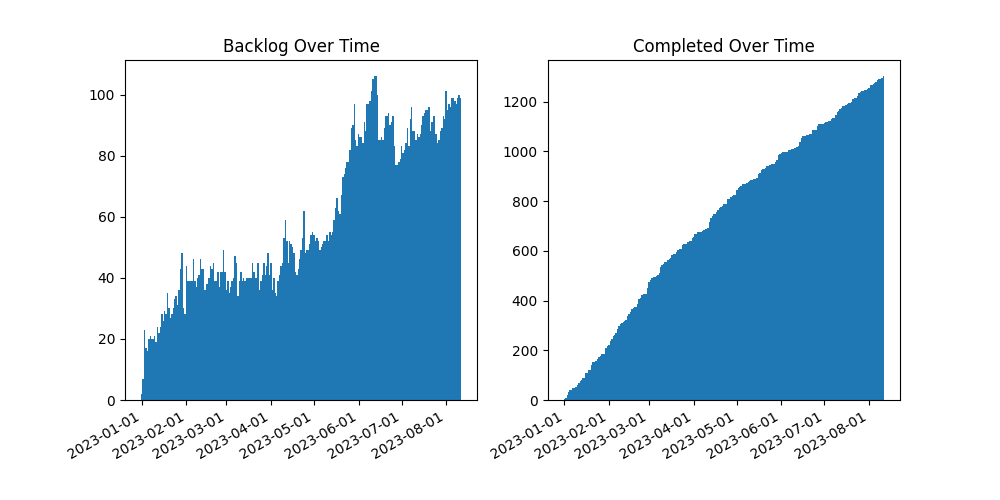

In [15]:
# Set up figures
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.title.set_text("Backlog Over Time")
ax2.title.set_text("Completed Over Time")
ax1.bar(chart_data["dates"], chart_data["incomplete"], width=1)
ax2.bar(chart_data["dates"], chart_data["complete"], width=1)

# Format dates
fig.autofmt_xdate()
date_form = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)

# mplcursors.cursor(hover=True)

In [16]:
# Tasks Added / Removed Today
today = dt.datetime.now()
week_ago = today - dt.timedelta(days=7)
today_stats = client.get_tasks_added_removed_between(start=week_ago, end=today)

print("THIS WEEK'S TASK STATS")

print(f'{ len(today_stats["created"]) } Task/s Created')
for t in today_stats["created"][:5]:
    print(f'  - { t["doc"]["title"] }')

print('')

print(f'{ len(today_stats["completed"]) } Task/s Completed')
for t in today_stats["completed"][:5]:
    print(f'  - { t["doc"]["title"] }')

THIS WEEK'S TASK STATS
34 Task/s Created
  - Review and think about our financial projections on my own [Slack Msg from Neil Shah](https://thinknimble.slack.com/archives/CNYHCPHRV/p1650463258685949)
  - Review Chaos Pod Forecast
  - Weekly Reminder: Check in on Mikael feedback - https://docs.google.com/document/d/1IsDx95KhuxhFXoGtF1jt8sz2L8GuZ2_hWqfYSMLquds/edit#heading=h.l6mv1kvmjclz
  - (Monthly) Pay PNC card
  - Jury Duty - Call after 5pm: 202-354-3518 | 103895809

37 Task/s Completed
  - Review and think about our financial projections on my own [Slack Msg from Neil Shah](https://thinknimble.slack.com/archives/CNYHCPHRV/p1650463258685949)
  - Review Chaos Pod Forecast
  - Weekly Reminder: Check in on Mikael feedback - https://docs.google.com/document/d/1IsDx95KhuxhFXoGtF1jt8sz2L8GuZ2_hWqfYSMLquds/edit#heading=h.l6mv1kvmjclz
  - (Monthly) Pay PNC card
  - Jury Duty - Call after 5pm: 202-354-3518 | 103895809


NOTE: Negative cycle times are recurring tasks that were marked 'done' before the date of recurrence.

Q1: 0.2332098726851852
Q3: 4.275013472222223
IQR: 4.041803599537038
outer_fence: 16.400424270833337
95th: 44.65886380324066
99th: 257.38622254537034

333 outliers of 3249: [16.49248732638889, 16.520068842592593, 16.581976875] ... [451.4066702777778, 523.7625834027778, 556.1934447916667]


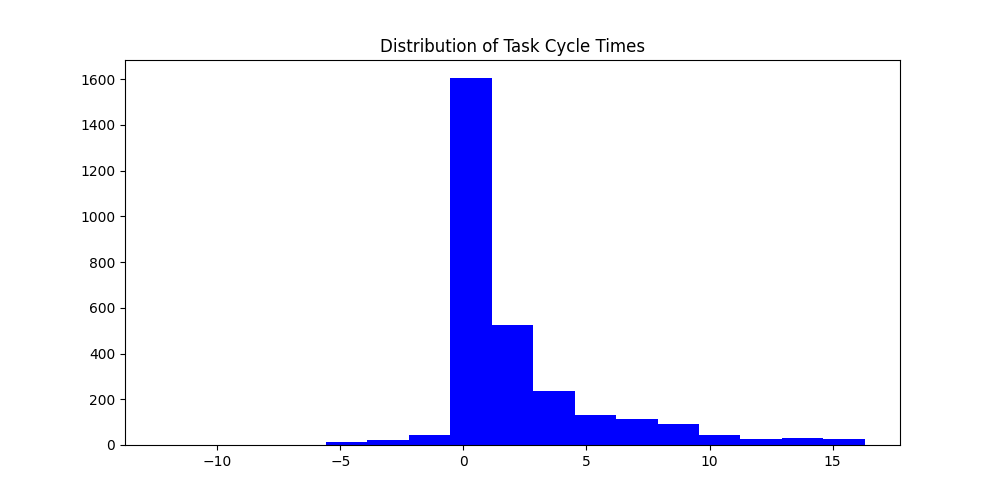

In [17]:
# Look at distribution of task cycle times
tasks = client.get_all_tasks()
cycle_times = sorted([t.cycle_time for t in tasks if t.done])

q1, q3, n5, n9 = np.percentile(cycle_times, [25, 75, 95, 99])
iqr = q3 - q1
outer_fence = q3 + 3*(iqr)

print("NOTE: Negative cycle times are recurring tasks that were marked 'done' before the date of recurrence.")

print(f"""
Q1: {q1}
Q3: {q3}
IQR: {iqr}
outer_fence: {outer_fence}
95th: {n5}
99th: {n9}
""")

outliers = sorted([c for c in cycle_times if c >= outer_fence])
print(f"{len(outliers)} outliers of {len(cycle_times)}: {outliers[:3]} ... {outliers[-3:]}")

# Filter out outliers
a = [i for i in cycle_times if i not in outliers]

# Plot it
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(a, bins=math.ceil(max(a)), histtype ='bar', facecolor='blue')
ax.title.set_text("Distribution of Task Cycle Times")


NOTE: Negative cycle times are recurring tasks that were marked 'done' before the date of recurrence.

Q1: 0.4459967216435185
Q3: 6.556475419560185
IQR: 6.110478697916666
outer_fence: 24.887911513310186
95th: 68.69045633969907
99th: 260.05099883217594

250 outliers of 2316: [<main.Task object at 0x137cfe6a0>, <main.Task object at 0x137ceb8e0>, <main.Task object at 0x137e8d760>] ... [<main.Task object at 0x137f2aac0>, <main.Task object at 0x137f31100>, <main.Task object at 0x137ced460>]


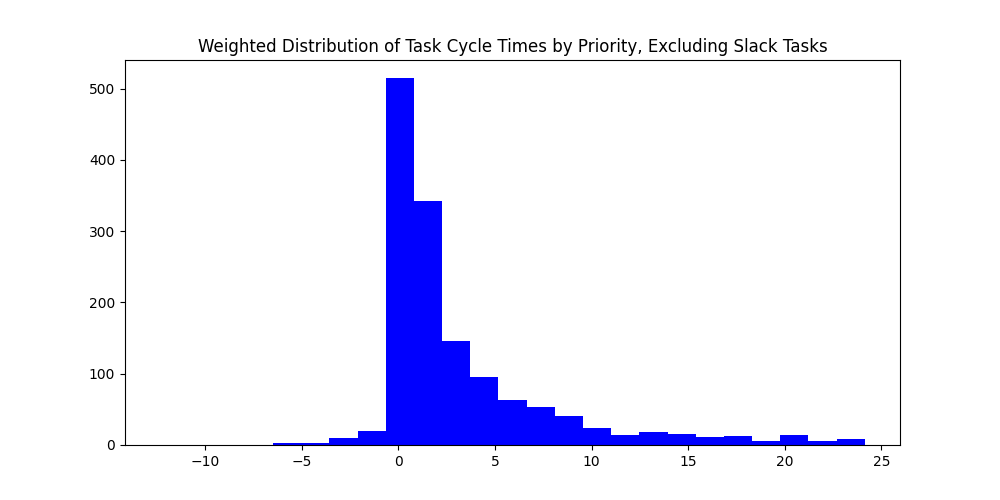

In [18]:
# CYCLE TIMES EXCLUDING TASKS MENTIONING SLACK AND WEIGHTED BY PRIORITY
tasks_no_slack = sorted([t for t in tasks if t.done and not 'slack' in t.data["doc"]["title"].lower()], key=lambda t: t.cycle_time)
cycle_times_no_slack = [t.cycle_time for t in tasks_no_slack]

q1, q3, n5, n9 = np.percentile(cycle_times_no_slack, [25, 75, 95, 99])
iqr = q3 - q1
outer_fence = q3 + 3*(iqr)

print("NOTE: Negative cycle times are recurring tasks that were marked 'done' before the date of recurrence.")

print(f"""
Q1: {q1}
Q3: {q3}
IQR: {iqr}
outer_fence: {outer_fence}
95th: {n5}
99th: {n9}
""")

# Filter Outliers
outliers = [t for t in tasks_no_slack if t.cycle_time >= outer_fence]
print(f"{len(outliers)} outliers of {len(tasks_no_slack)}: {outliers[:3]} ... {outliers[-3:]}")

tasks_no_slack_or_outliers = [t for t in tasks_no_slack if t not in outliers]
cycles_no_slack_or_outliers = [t.cycle_time for t in tasks_no_slack_or_outliers]
weights = [t.is_starred/3 for t in tasks_no_slack_or_outliers]

# Plot it
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(
    cycles_no_slack_or_outliers,
    bins=math.ceil(max(cycles_no_slack_or_outliers)),
    weights=weights,
    histtype ='bar',
    facecolor='blue',
)
ax.title.set_text("Weighted Distribution of Task Cycle Times by Priority, Excluding Slack Tasks")
mplcursors.cursor(hover=True)